# Performances between Groups



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load primary data
primaryData = pd.read_csv(r'./data/table1.csv')
primaryData = primaryData[primaryData['Experimental Status']!='Disceased']
primaryData.drop(['Age (wks)','Birth status', 'Estimated Delivery Date', 'Delivery Date', 'Set up', 'Ween', 'Male Status', 'Breeding Status',
              'Virus Implantation'],axis=1,inplace=True)

primaryData

,Mouse ID,Genotype,Gender,Line,TgSWDI,Genotype 2,Genotype 3,Father,Mother,DOB,Maze Configuration,Treatment Group,Experimental Status
0,170,Tg-SwDI,M,Tg-SwDI,Pos,NaN,NaN,Tg-SwDI (116),Tg-SwDI (117),8/2/2019,ABFG,--,Testing
1,171,Tg-SwDI,M,Tg-SwDI,Pos,NaN,NaN,Tg-SwDI (116),Tg-SwDI (117),8/2/2019,ABFG,--,Testing
2,224,Tg-SwDI,M,Tg-SwDI x ThCre,Pos,Neg,NaN,Tg-SwDI(116),ThCre(71/99),8/24/2019,ABFG,--,Testing
3,225,Tg-SwDI,M,Tg-SwDI x ThCre,Pos,Neg,NaN,Tg-SwDI(116),ThCre(71/99),8/24/2019,ABFG,--,Testing
4,233,Tg-SwDI,M,Tg-SwDI x ThCre,Pos,Neg,NaN,Tg-SwDI(116),ThCre(71/99),8/24/2019,ABFG,--,Testing
5,172,Tg-SwDI,F,NaN,Pos,NaN,NaN,Tg-SwDI (116),Tg-SwDI (117),8/2/2019,BCEG,--,Testing
6,173,Tg-SwDI,F,Tg-SwDI,Pos,NaN,NaN,Tg-SwDI (116),Tg-SwDI (117),8/2/2019,BCEG,--,Testing
7,174,Tg-SwDI,F,Tg-SwDI,Pos,NaN,NaN,Tg-SwDI (116),Tg-SwDI (117),8/2/2019,BCEG,--,Testing
8,175,Tg-SwDI,F,Tg-SwDI,Pos,NaN,NaN,Tg-SwDI (116),Tg-SwDI (117),8/2/2019,BCEG,--,Testing
9,231,Tg-SwDI,F,Tg-SwDI,Pos,NaN,NaN,Tg-SwDI(116),ThCre(71/99),8/24/2019,BCEG,--,Testing


In [4]:
# load experimental data
experimentalData = pd.read_csv(r'./data/table2_update.csv')
experimentalData = experimentalData[experimentalData['Date']>='2020-01-01']
print(experimentalData[['Date','Start Time','End Time']].isnull().sum())

#experimentalData.dropna(subset=['Start Time','End Time'])
experimentalData.fillna(0)

Date          0
Start Time    7
End Time      7
dtype: int64


,Mouse ID,Date,Weight,Baited Arms Retrieved,Reference Memory Errors,Working Memory Errors,Other Notes,Start Time,End Time,Video Length,...,Distance,Center,ArmA,ArmB,ArmC,ArmD,ArmE,ArmF,ArmG,ArmH
442,282,2020-01-01,22,0,20,32,0,2020-01-01 10:56:55,2020-01-01 11:06:55,0:10:00,...,21976.567308,0.127251,0.092354,0.077351,0.079851,0.251834,0.226161,0.016948,0.075406,0.054179
443,286,2020-01-01,24,0,22,28,0,2020-01-01 12:53:09,2020-01-01 13:02:10,0:09:01,...,23247.547933,0.112399,0.055121,0.089401,0.084284,0.037734,0.108638,0.327086,0.145385,0.041433
444,255,2020-01-01,27,0,19,25,0,2020-01-01 14:40:03,2020-01-01 14:49:17,0:09:14,...,19706.210634,0.094680,0.088969,0.072378,0.033724,0.107604,0.130448,0.259633,0.182387,0.032101
445,261,2020-01-01,28,0,26,46,0,2020-01-01 13:40:21,2020-01-01 13:49:55,0:09:34,...,27863.110858,0.216202,0.078223,0.096806,0.122706,0.142509,0.096632,0.101278,0.076829,0.071661
446,260,2020-01-01,28,1,23,27,0,2020-01-01 13:18:12,2020-01-01 13:28:02,0:09:50,...,16997.318591,0.117993,0.168230,0.081657,0.080018,0.156476,0.221349,0.049051,0.050746,0.077588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,184,2020-03-14,21,4,6,5,0,2020-03-14 16:21:51,2020-03-14 16:24:46,0:02:55,...,6655.527613,0.075561,0.047012,0.123144,0.122764,0.180434,0.098592,0.016939,0.174343,0.161591
1062,228,2020-03-14,24,4,6,4,0,2020-03-14 18:49:16,2020-03-14 18:50:44,0:01:28,...,6492.794653,0.151607,0.081285,0.136484,0.050662,0.246125,0.031758,0.081664,0.145180,0.075614
1063,178,2020-03-14,29,4,4,2,0,2020-03-14 15:30:11,2020-03-14 15:32:29,0:02:18,...,4653.022679,0.058795,0.051566,0.085301,0.112530,0.128916,0.000000,0.347711,0.102169,0.113494
1064,181,2020-03-14,25,4,6,6,0,2020-03-14 18:39:59,2020-03-14 18:42:15,0:02:16,...,6789.697856,0.136319,0.086882,0.018355,0.036221,0.138277,0.000000,0.258688,0.099853,0.226383


In [5]:
# all mice under test
primaryData = primaryData[primaryData['Experimental Status']=='Testing']

In [6]:
# number of valid mice (testing)
allMice = list(pd.unique(primaryData['Mouse ID']))
print(allMice)
print("Total number of testing mice:", len(allMice))


['170', '171', '224', '225', '233', '172', '173', '174', '175', '231', '254', '255', '260', '261', '282', '284', '285', '286', '177', '178', '181', '182', '228', '230', '232', '259', '264', '184', '236', '190', '193', '194', '196', '207', '202', '203', '71', '99', '131', '210', '211']
Total number of testing mice: 41


In [7]:
experimentalData.to_csv(r'.\data\before.csv')

df_delete_first_seven_sessions = pd.DataFrame({})

for m in allMice:
    records = experimentalData[experimentalData['Mouse ID'] == int(m)]
    times = records.shape[0]
    if times <= 7:
        pass
    else:
        records.reset_index(drop=True,inplace=True)
        records = records[7:]
        df_delete_first_seven_sessions = pd.concat([df_delete_first_seven_sessions,records])

experimentalData = df_delete_first_seven_sessions
experimentalData.reset_index(drop=True,inplace=True)
experimentalData.to_csv(r'.\data\after.csv')

## Grouping

Genotype Groups:

1. Tg-SwDI + (--)

2. Tg-SwDI + (MAMP)

3. Th-Cre + (--)

4. Tg-SwDI+ x Th-Cre + (low dose)

5. Tg-SwDI+ x Th-Cre + (high dose)

In [8]:
class Group:

    # From Group object we can easily retrieve mice data in one group
    
    def __init__(self,primaryData,experimentalData,genotype,treatment):

        # initialize parameter: 
        #     primaryData: total primary mice data
        #     experimentalData: total experimental data
        #     genotype: group genotype
        #     treatment: group treatment
        # properties:
        #     name, genotype, treatment, members, size, groupPrimaryData, groupExperimentalData
        # methods: 
        #     group.info(self): display group infomation
        
        groupPrimaryData = primaryData[primaryData['Genotype']==genotype]
        groupPrimaryData = groupPrimaryData[groupPrimaryData['Treatment Group']==treatment]
        groupPrimaryData.reset_index(drop=True,inplace=True)
        
        self.name = genotype + '(' + treatment + ')'
        self.groupPrimaryData = groupPrimaryData
        self.genotype = genotype
        self.treatment = treatment
        self.members = list(groupPrimaryData['Mouse ID'])
        self.size = len(list(groupPrimaryData['Mouse ID']))
        
        def in_group(x):
            return str(x) in self.members
        groupExperimentalData = experimentalData[experimentalData['Mouse ID'].apply(in_group)]
        groupExperimentalData.reset_index(drop=True,inplace=True)
        self.groupExperimentalData = groupExperimentalData

        
    def info(self):
        print('---------------------------------')
        print('Genotype:',self.genotype,' | Treatment:',self.treatment)
        print('Members:',self.members)
        print('Size:',self.size)
        return


In [9]:
# Create instances for Group object
group1 = Group(primaryData,experimentalData,'Tg-SwDI','--')
group2 = Group(primaryData,experimentalData,'Tg-SwDI','MAMP')
group3 = Group(primaryData,experimentalData,'ThCre','--')
group4 = Group(primaryData,experimentalData,'Tg-SwDI x ThCre','Low Dose CNO')
group5 = Group(primaryData,experimentalData,'Tg-SwDI x ThCre','High Dose CNO')

# Do grouping and display group info
grouping = [group1,group2,group3,group4,group5]
group1.info()
group2.info()
group3.info()
group4.info()
group5.info()

# example: retrieve group1 primary data
group1.groupPrimaryData

---------------------------------
Genotype: Tg-SwDI  | Treatment: --
Members: ['170', '171', '224', '225', '233', '172', '173', '174', '175', '231']
Size: 10
---------------------------------
Genotype: Tg-SwDI  | Treatment: MAMP
Members: ['254', '255', '260', '261', '282', '284', '285', '286']
Size: 8
---------------------------------
Genotype: ThCre  | Treatment: --
Members: ['190', '193', '194', '196', '207', '202', '203', '71', '99', '131', '210', '211']
Size: 12
---------------------------------
Genotype: Tg-SwDI x ThCre  | Treatment: Low Dose CNO
Members: ['259', '264', '184', '236']
Size: 4
---------------------------------
Genotype: Tg-SwDI x ThCre  | Treatment: High Dose CNO
Members: ['177', '178', '181', '182', '228', '230', '232']
Size: 7


,Mouse ID,Genotype,Gender,Line,TgSWDI,Genotype 2,Genotype 3,Father,Mother,DOB,Maze Configuration,Treatment Group,Experimental Status
0,170,Tg-SwDI,M,Tg-SwDI,Pos,NaN,NaN,Tg-SwDI (116),Tg-SwDI (117),8/2/2019,ABFG,--,Testing
1,171,Tg-SwDI,M,Tg-SwDI,Pos,NaN,NaN,Tg-SwDI (116),Tg-SwDI (117),8/2/2019,ABFG,--,Testing
2,224,Tg-SwDI,M,Tg-SwDI x ThCre,Pos,Neg,NaN,Tg-SwDI(116),ThCre(71/99),8/24/2019,ABFG,--,Testing
3,225,Tg-SwDI,M,Tg-SwDI x ThCre,Pos,Neg,NaN,Tg-SwDI(116),ThCre(71/99),8/24/2019,ABFG,--,Testing
4,233,Tg-SwDI,M,Tg-SwDI x ThCre,Pos,Neg,NaN,Tg-SwDI(116),ThCre(71/99),8/24/2019,ABFG,--,Testing
5,172,Tg-SwDI,F,NaN,Pos,NaN,NaN,Tg-SwDI (116),Tg-SwDI (117),8/2/2019,BCEG,--,Testing
6,173,Tg-SwDI,F,Tg-SwDI,Pos,NaN,NaN,Tg-SwDI (116),Tg-SwDI (117),8/2/2019,BCEG,--,Testing
7,174,Tg-SwDI,F,Tg-SwDI,Pos,NaN,NaN,Tg-SwDI (116),Tg-SwDI (117),8/2/2019,BCEG,--,Testing
8,175,Tg-SwDI,F,Tg-SwDI,Pos,NaN,NaN,Tg-SwDI (116),Tg-SwDI (117),8/2/2019,BCEG,--,Testing
9,231,Tg-SwDI,F,Tg-SwDI,Pos,NaN,NaN,Tg-SwDI(116),ThCre(71/99),8/24/2019,BCEG,--,Testing


In [10]:
class Mouse:
    
    # From Mouse object we can easily retrieve individual mouse data
    
    def __init__(self, grouping, ID: str):

        # initialize parameter: 
        #     grouping: a list of Group objects
        #     ID: mouse id
        # properties:
        #     ID, category, primaryData, experimentalData
        # methods:
        #     mouse.get_age_wks(self,date): return age(wks) ceiled by certain date
        #     mouse.get_weekly_performance(self): return weekly performance (dataframe) of individual mouse 

        self.ID = ID 
        for group in grouping:
            if ID in group.members:
                self.category = group.name 
                self.primaryData = group.groupPrimaryData[group.groupPrimaryData['Mouse ID']==self.ID]
                experimentalData = group.groupExperimentalData[group.groupExperimentalData['Mouse ID']==int(self.ID)]
                experimentalData.reset_index(drop=True, inplace=True)
                self.experimentalData = experimentalData
    
    def get_age_wks(self,date):
        
        self.primaryData['Age(days)'] = np.empty_like(self.primaryData['Mouse ID'])
        today = pd.to_datetime(str(datetime.date.today()))
        
        for i in list(self.primaryData.index):
            dob = pd.to_datetime(str(self.primaryData['DOB'][i]))
            age_days = str(date - dob)[:-14]
            age_wks = math.ceil(int(age_days) / 7.0)
            
        return age_wks
    
    
    def get_weekly_performance(self):

        m_df = self.experimentalData[['Date','Weight','Baited Arms Retrieved','Reference Memory Errors','Working Memory Errors','Video Length']]
        m_df['Date'] = pd.to_datetime(m_df['Date'])

        bins_dt = pd.date_range('2020-01-01', freq='7D', periods=100)
        bins_str = bins_dt.astype(str).values

        labels = ['({}, {}]'.format(bins_str[i-1], bins_str[i]) for i in range(1, len(bins_str))]


        m_df['cat'] = pd.cut(m_df.Date.astype(np.int64)//10**9,
                           bins=bins_dt.astype(np.int64)//10**9,
                           labels=labels)
        m_df['cat'] = m_df['cat'].cat.remove_unused_categories()
        
        m_df['Age(wks)'] = np.empty_like(m_df['Date'])
        for i in range(len(m_df['Date'])):
            m_df.loc[i,'Age(wks)'] = int(self.get_age_wks(m_df.loc[i,'Date']))
        m_df['Age(wks)'] = m_df['Age(wks)'].astype(np.int64)
        
        m_df['Mouse ID'] = np.empty_like(m_df['Date'])
        for i in range(len(m_df['Date'])):
            m_df.loc[i,'Mouse ID'] = self.ID
        
        m_df = m_df[['Date','Mouse ID','Weight','Age(wks)','Baited Arms Retrieved','Reference Memory Errors','Working Memory Errors','Video Length','cat']]
        m_df.sort_values(by='Date',inplace=True)
        m_df.reset_index(drop=True,inplace=True)
        
        return m_df

##################################################################################################

def collect_weekly_performance(group=None):
    
    if group == None:
        # get weekly data for all mice
        m_ID = allMice[0]
        m = Mouse(grouping,m_ID)
        df = m.get_weekly_performance()
        
        for m_ID in allMice[1:]:

            m = Mouse(grouping,m_ID)
            df_append = m.get_weekly_performance()
            df = pd.concat([df,df_append],axis=0)
        
        df.sort_values(by='Age(wks)',inplace=True)
        return df
    
    else:
        # get weekly data for mice in one group
        m_ID = group.members[0]
        m = Mouse(grouping,m_ID)
        df = m.get_weekly_performance()
        
        for m_ID in group.members[1:]:
            
            m = Mouse(grouping,m_ID)
            df_append = m.get_weekly_performance()
            df = pd.concat([df,df_append],axis=0)
        
        return df

##################################################################################################

def get_weekly_mean(df):
    
    df_mean = df.groupby('Age(wks)').mean()
    df_mean.reset_index(drop=False,inplace=True)
    df_mean.sort_values(by='Age(wks)',inplace=True)
    df_mean.reset_index(drop=True,inplace=True)
    
    return df_mean

##################################################################################################

def plot_weekly_mean(df_mean,group,ax):
    
    weight_mean = df_mean['Weight']
    finished_mean = df_mean['Baited Arms Retrieved']
    rme_mean = df_mean['Reference Memory Errors']
    wme_mean =  df_mean['Working Memory Errors']
    
    age_wks = sorted(df_mean['Age(wks)'])
    print(age_wks)
    
    l1, = plt.plot(age_wks,rme_mean,label='avg_RME')
    l2, = plt.plot(age_wks,wme_mean,label='avg_WME') 
    ax.legend()
    ax.set_title(group.name)
    ax.set_xlabel('Age(wks)')
    ax.set_ylabel('Errors')

###################################################################################################

def weekly_errorbar_wme(df,group,ax):

    wks = df['Age(wks)'].unique()
    age_wks = sorted(wks)

    ls_wme = []
    for wk in age_wks:
        wme = df[df['Age(wks)']==wk]['Working Memory Errors']
        ls_wme.append(wme)

    ax.boxplot(ls_wme,positions=age_wks, patch_artist=True, boxprops=dict(facecolor="C0"))

    ax.set_title(group.name)
    ax.set_xlabel('Age(wks)')
    ax.set_ylabel('Errors') 


def weekly_errorbar_rme(df,group,ax):

    wks = df['Age(wks)'].unique()
    age_wks = sorted(wks)

    ls_rme = []
    for wk in age_wks:
        rme = df[df['Age(wks)']==wk]['Reference Memory Errors']
        ls_rme.append(rme)

    ax.boxplot(ls_rme,positions=age_wks, patch_artist=True, boxprops=dict(facecolor="C2"))
    
    ax.set_title(group.name)
    ax.set_xlabel('Age(wks)')
    ax.set_ylabel('Errors') 

[23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
[27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
[20, 21, 29, 30, 34, 35, 36]
[28, 29, 34, 35, 36]


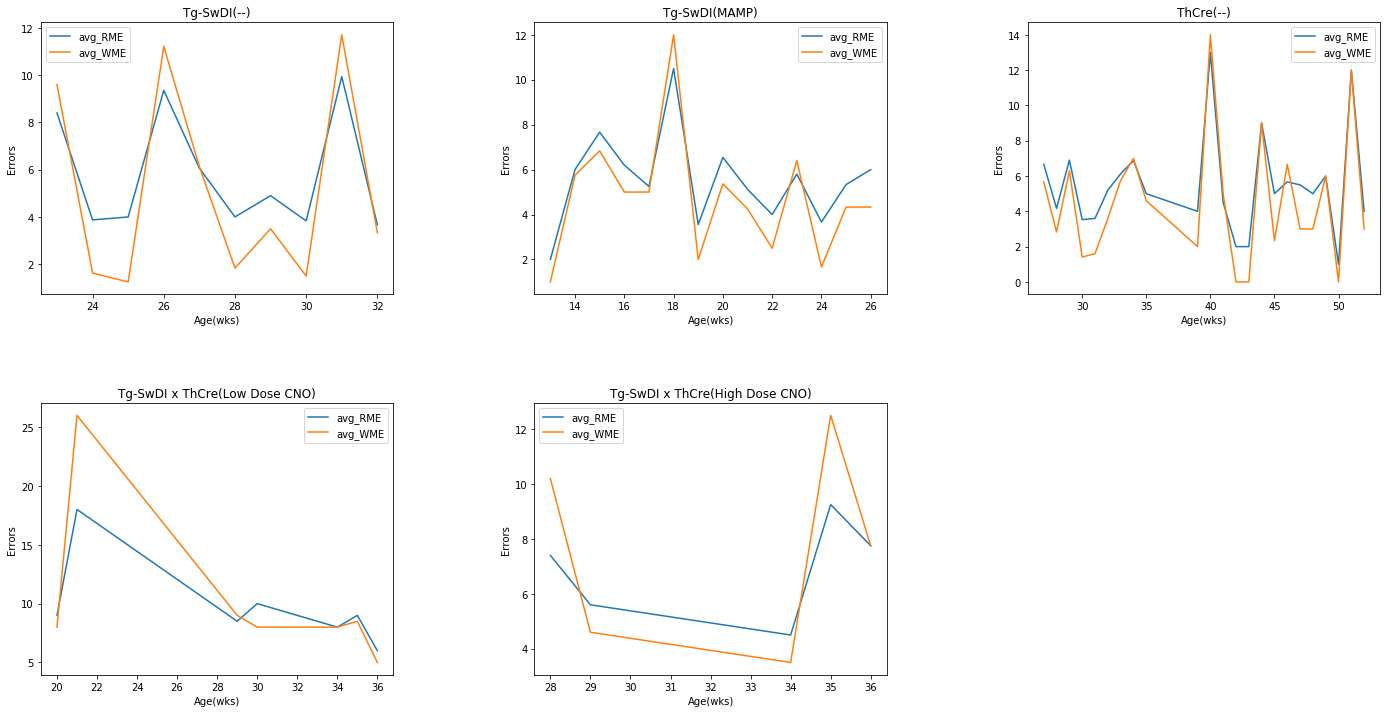

In [11]:
fig = plt.figure(figsize=(24,12))
i = 1

for group in grouping:
    
    df = collect_weekly_performance(group)
    df_mean = get_weekly_mean(df)
    
    ax = fig.add_subplot(2,3,i)
    plot_weekly_mean(df_mean,group,ax)

    i += 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
plt.savefig(r'./fig/performance_snapshot_group_20200314.png')
plt.show()


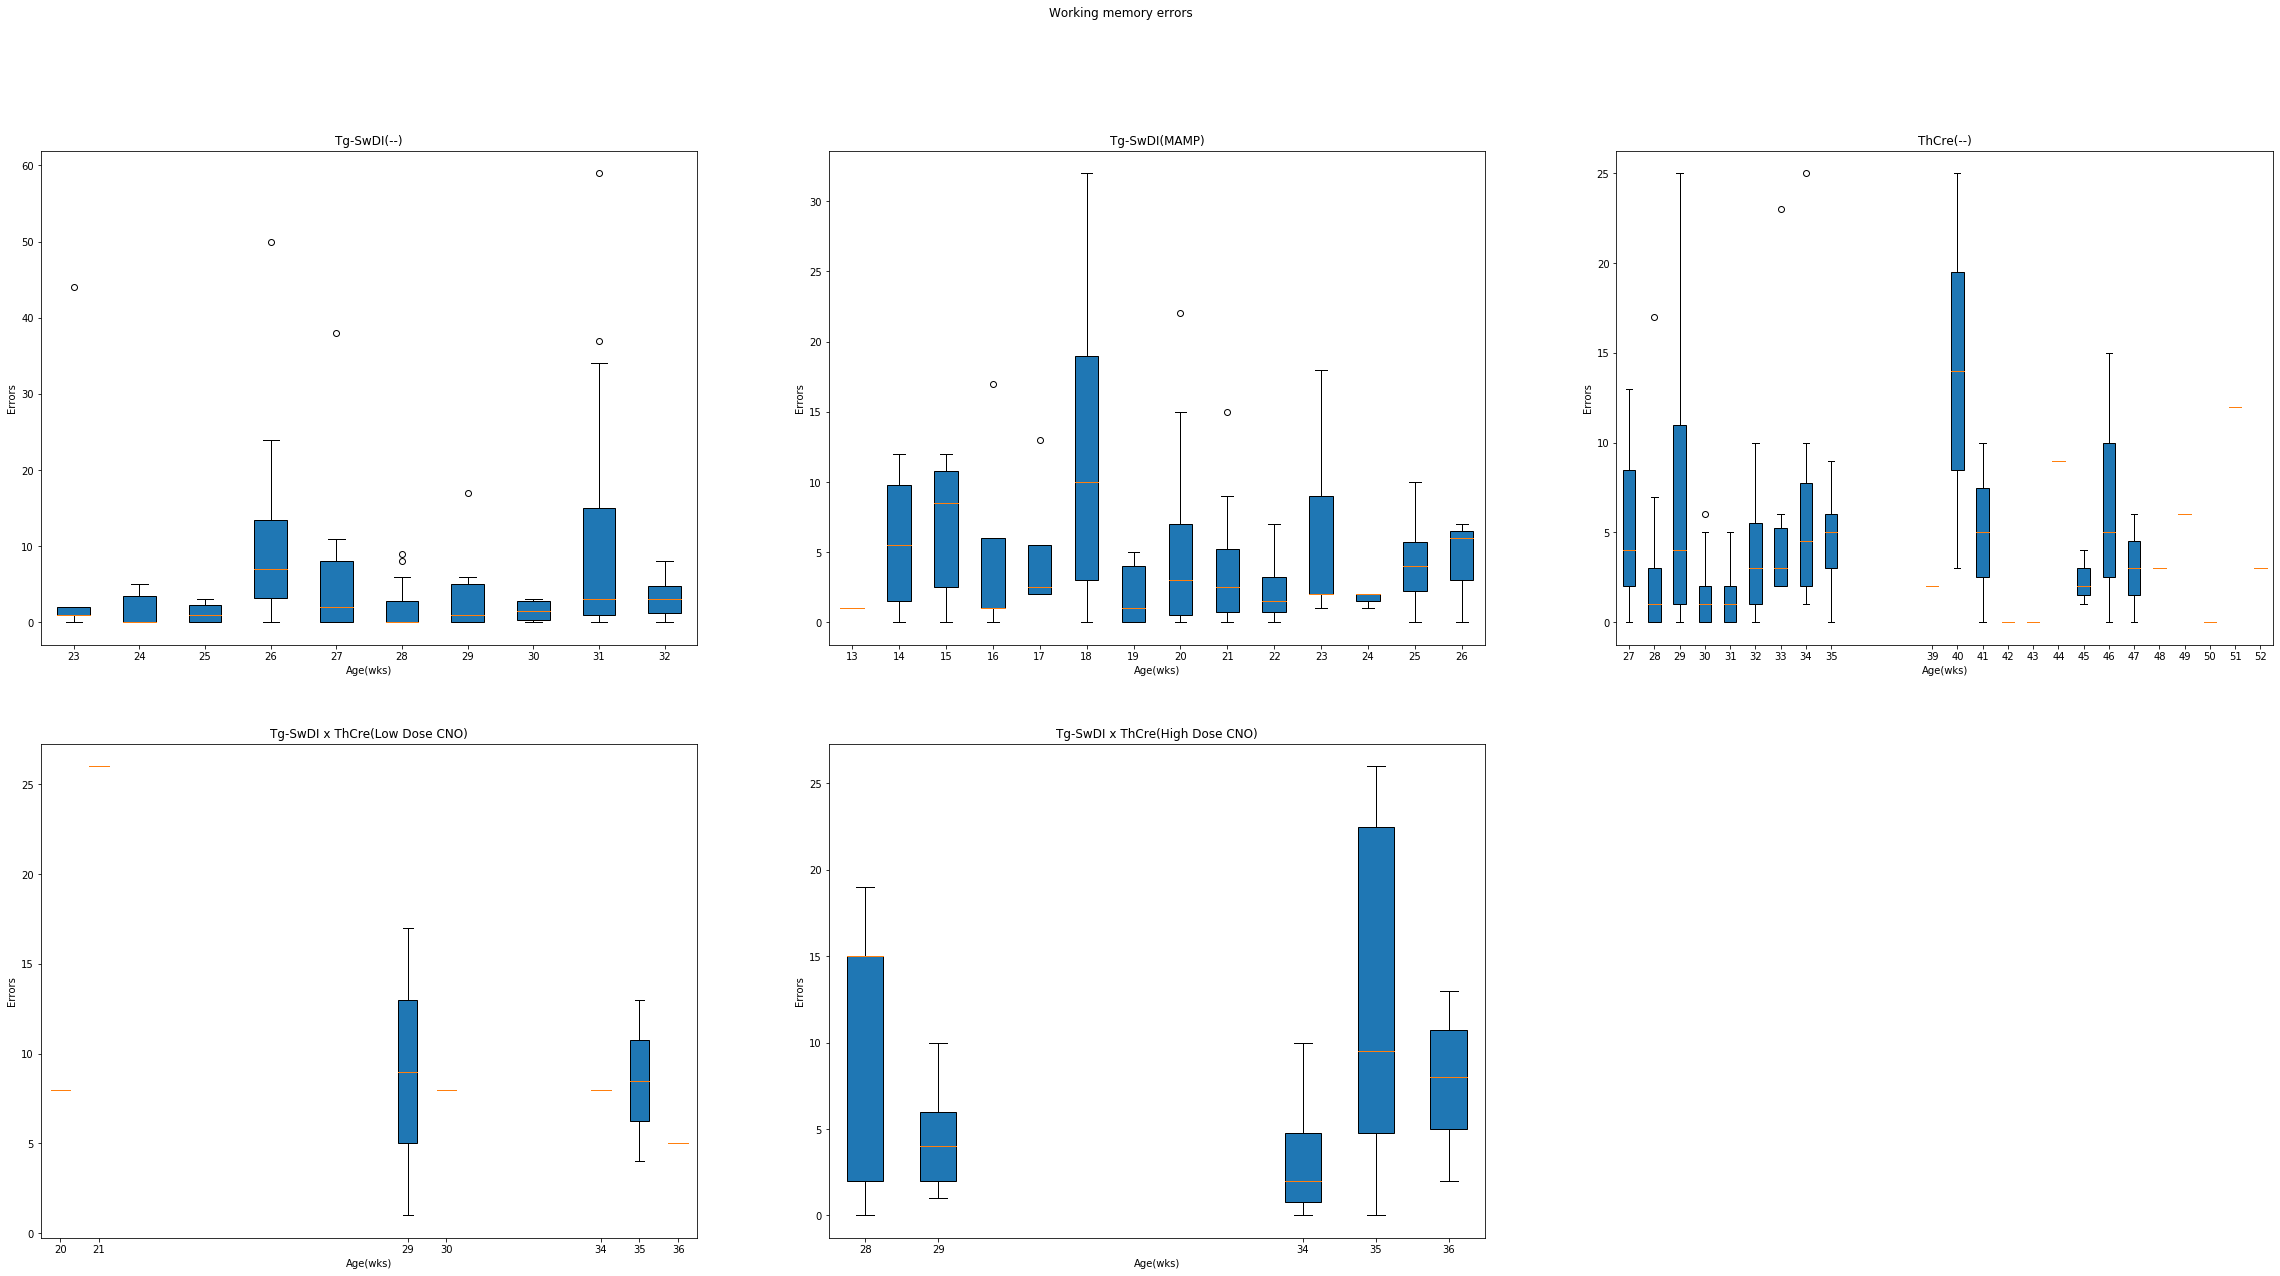

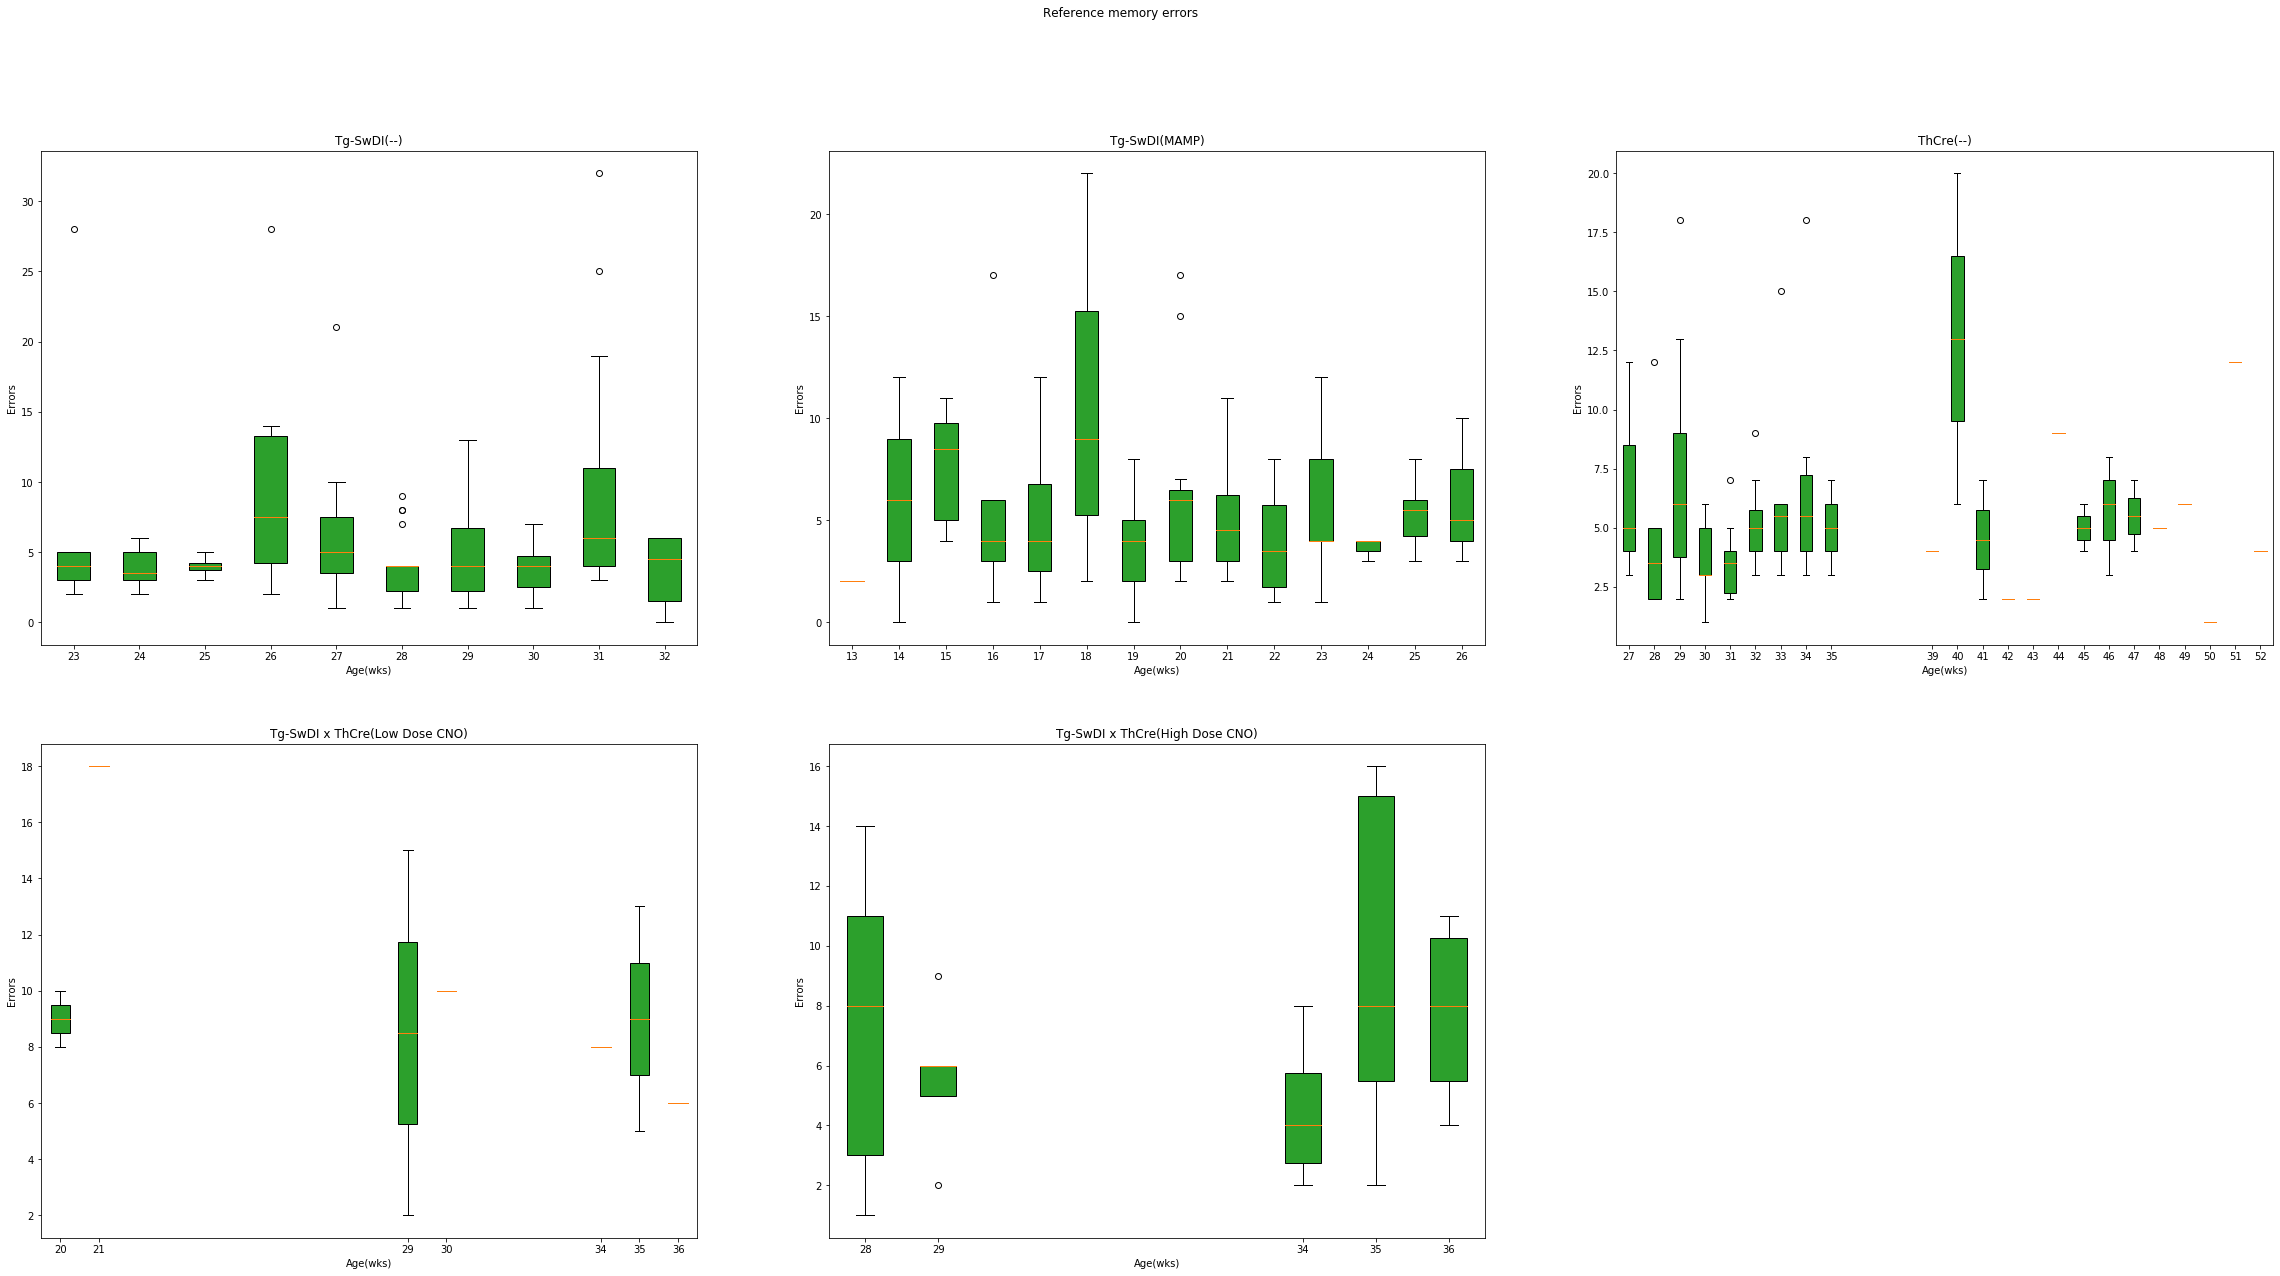

In [12]:
fig = plt.figure(figsize=(40,20))
i = 1

for group in grouping:
    
    df = collect_weekly_performance(group)
    #print(df['Age(wks)'].unique())
    df_mean = get_weekly_mean(df)
    
    ax = fig.add_subplot(2,3,i)
    #plot_weekly_mean(df_mean,group,ax)
    weekly_errorbar_wme(df,group,ax)

    i += 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
fig.suptitle('Working memory errors')
plt.savefig(r'./fig/WME.png')
plt.show()

fig = plt.figure(figsize=(40,20))
i = 1

for group in grouping:
    
    df = collect_weekly_performance(group)
    #print(df['Age(wks)'].unique())
    df_mean = get_weekly_mean(df)
    
    ax = fig.add_subplot(2,3,i)
    #plot_weekly_mean(df_mean,group,ax)
    weekly_errorbar_rme(df,group,ax)

    i += 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
fig.suptitle('Reference memory errors')
plt.savefig(r'./fig/RME.png')
plt.show()
